## Первичный анализ датасета

#### Все нужные import

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split

#### Инициализация датасета

In [10]:
df = pd.read_csv("../datasets/yu_dataset.csv")

#### Круговая диаграмма

                     Количество
http_url_categories            
нет                        1157
студент                      13
видеохостинг                  1


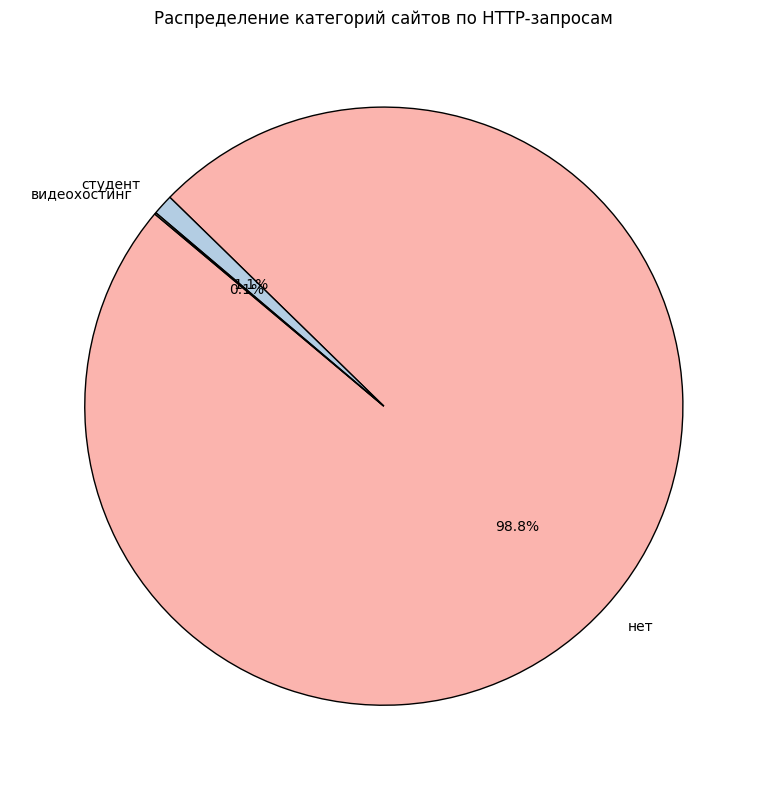

In [11]:
if 'http_url_categories' not in df.columns:
    raise ValueError("Столбец 'http_url_categories' не найден в таблице.")

category_counts = df['http_url_categories'].value_counts()

print(category_counts.to_frame(name='Количество'))

plt.figure(figsize=(8, 8))
category_counts.plot.pie(
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Pastel1.colors,
    wedgeprops=dict(edgecolor='black')
)

plt.title("Распределение категорий сайтов по HTTP-запросам")
plt.ylabel("")
plt.tight_layout()
plt.savefig("../img/url_categories_pie_chart.png")
plt.show()


## Классификация данных

#### Создание столбцов Label_y Label_x

In [12]:
Label_y = df['http_url_categories']
Label_x = df.drop(columns=['time_window_start', 'http_url_categories'])

print("Первые строки целевого столбца:")
print(Label_y.head())

print("\nПервые строки признаков:")
# print(Label_x.head())
pd.DataFrame(Label_x, columns=Label_x.columns).head()

Первые строки целевого столбца:
0    нет
1    нет
2    нет
3    нет
4    нет
Name: http_url_categories, dtype: object

Первые строки признаков:


,tcp_packet_count,udp_packet_count,http_packet_count,tcp_sessions_count,udp_sessions_count,tcp_src_ports_count,udp_src_ports_count,tcp_dst_ports_count,udp_dst_ports_count,avg_pkt_length,avg_tcp_pkt_length,avg_udp_pkt_length,unique_ip_count,http_url_count,avg_http_url_length
0,0,0,0,0,0,0,0,0,0,62,0,0,0,0,0
1,0,22,0,0,1,0,1,0,1,392,0,482,2,0,0
2,2,0,0,2,0,2,0,2,0,61,60,0,2,0,0
3,0,0,0,0,0,0,0,0,0,62,0,0,0,0,0
4,16,4,0,4,0,3,3,3,3,306,432,167,2,4,26


#### Обработка данных для классификаторов

In [16]:
le = LabelEncoder()
Label_y_encoded = le.fit_transform(Label_y)

scaler = StandardScaler()
Label_x_scaled = scaler.fit_transform(Label_x)

label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("\nКодировка категорий (Label_y):")
print(label_mapping)

print("\nПервые строки масштабированных признаков:")
pd.DataFrame(Label_x_scaled, columns=Label_x.columns).head()


Кодировка категорий (Label_y):
{'видеохостинг': 0, 'нет': 1, 'студент': 2}

Первые строки масштабированных признаков:


,tcp_packet_count,udp_packet_count,http_packet_count,tcp_sessions_count,udp_sessions_count,tcp_src_ports_count,udp_src_ports_count,tcp_dst_ports_count,udp_dst_ports_count,avg_pkt_length,avg_tcp_pkt_length,avg_udp_pkt_length,unique_ip_count,http_url_count,avg_http_url_length
0,-0.260078,-0.148510,-0.073977,-0.895410,-0.227563,-1.109719,-0.274435,-0.939883,-0.272970,-0.829544,-1.026788,-0.452467,-0.871645,-0.097288,-0.126799
1,-0.260078,-0.097982,-0.073977,-0.895410,-0.098644,-1.109719,-0.033352,-0.939883,-0.029892,0.233534,-1.026788,1.298994,-0.504488,-0.097288,-0.126799
2,-0.258770,-0.148510,-0.073977,-0.625206,-0.227563,-0.635023,-0.274435,-0.412269,-0.272970,-0.832765,-0.838088,-0.452467,-0.504488,-0.097288,-0.126799
3,-0.260078,-0.148510,-0.073977,-0.895410,-0.227563,-1.109719,-0.274435,-0.939883,-0.272970,-0.829544,-1.026788,-0.452467,-0.871645,-0.097288,-0.126799
4,-0.249618,-0.139323,-0.073977,-0.355003,-0.227563,-0.397675,0.448814,-0.148462,0.456264,-0.043510,0.331845,0.154367,-0.504488,2.861795,5.794264


#### Разделение на обучающую и тестовую выборки

Пропорция: Вариант 9 (3:4)

In [15]:
x_train, x_test, y_train, y_test = train_test_split(
    Label_x_scaled,
    Label_y_encoded,
    test_size=10/14,
    random_state=42,  # Для воспроизводимости
    stratify=Label_y_encoded  # Стратифицированное разделение (сохраняет распределение классов)
)

print("\nРазмер обучающей выборки:", x_train.shape[0])
print("Размер тестовой выборки:", x_test.shape[0])


ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

#### Обучение классификаторов

In [17]:
results = {}

for depth in [2, 5]:
    gbc = GradientBoostingClassifier(max_depth=depth, random_state=42)
    gbc.fit(x_train, y_train)
    y_pred = gbc.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    results[f"GradientBoosting (depth={depth})"] = acc

for depth in [2, 5]:
    rf = RandomForestClassifier(max_depth=depth, random_state=42)
    rf.fit(x_train, y_train)
    y_pred = rf.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    results[f"RandomForest (depth={depth})"] = acc

print("\nРезультаты классификации:")
for model_name, acc in results.items():
    print(f"{model_name}: точность = {acc:.4f}")


NameError: name 'x_train' is not defined

#### Получение метрик оценок эффективности классификации

In [ ]:
print("\nПодробные метрики классификации:\n")

for depth in [2, 5]:
    for model_type, Model in [
        ("GradientBoosting", GradientBoostingClassifier),
        ("RandomForest", RandomForestClassifier)
    ]:
        clf = Model(max_depth=depth, random_state=42)
        clf.fit(x_train, y_train)
        y_pred = clf.predict(x_test)
        
        print(f"=== {model_type} (depth={depth}) ===")
        print("Accuracy:", accuracy_score(y_test, y_pred))
        print("Precision:", precision_score(y_test, y_pred, average="weighted", zero_division=0))
        print("Recall:", recall_score(y_test, y_pred, average="weighted"))
        print("F1 Score:", f1_score(y_test, y_pred, average="weighted"))
        
        # ROC-AUC можно посчитать только при бинарной классификации или в режиме "ovr"
        try:
            y_proba = clf.predict_proba(x_test)
            roc_auc = roc_auc_score(y_test, y_proba, multi_class="ovr", average="weighted")
            print("ROC-AUC:", roc_auc)
        except:
            print("ROC-AUC: невозможно вычислить")
        
        print()



Подробные метрики классификации:

=== GradientBoosting (depth=2) ===
Accuracy: 0.9106002554278416
Precision: 0.8947177254472205
Recall: 0.9106002554278416
F1 Score: 0.9002147171102756
ROC-AUC: 0.9139716275508194

=== RandomForest (depth=2) ===
Accuracy: 0.9259259259259259
Precision: 0.8573388203017833
Recall: 0.9259259259259259
F1 Score: 0.8903133903133903
ROC-AUC: 0.9229194028237061

=== GradientBoosting (depth=5) ===
Accuracy: 0.913154533844189
Precision: 0.8974391652901795
Recall: 0.913154533844189
F1 Score: 0.9037493536148813
ROC-AUC: 0.9008317952252762

=== RandomForest (depth=5) ===
Accuracy: 0.9195402298850575
Precision: 0.8832130832130832
Recall: 0.9195402298850575
F1 Score: 0.8951913046630394
ROC-AUC: 0.9197587095478973



### Выводы

1) GradientBoosting с depth=5 показал наилучший баланс метрик F1 Score, Precision и Recall.

2) RandomForest с depth=2 имеет лучшую Accuracy, но хуже Precision, что может означать больше ложноположительных классификаций.

3) Повышение глубины (с 2 до 5) немного улучшает F1 и Recall, но не всегда — иногда Accuracy падает.

4) ROC-AUC для всех моделей > 0.9, что говорит о хорошем разделении классов.

#### Визуализация

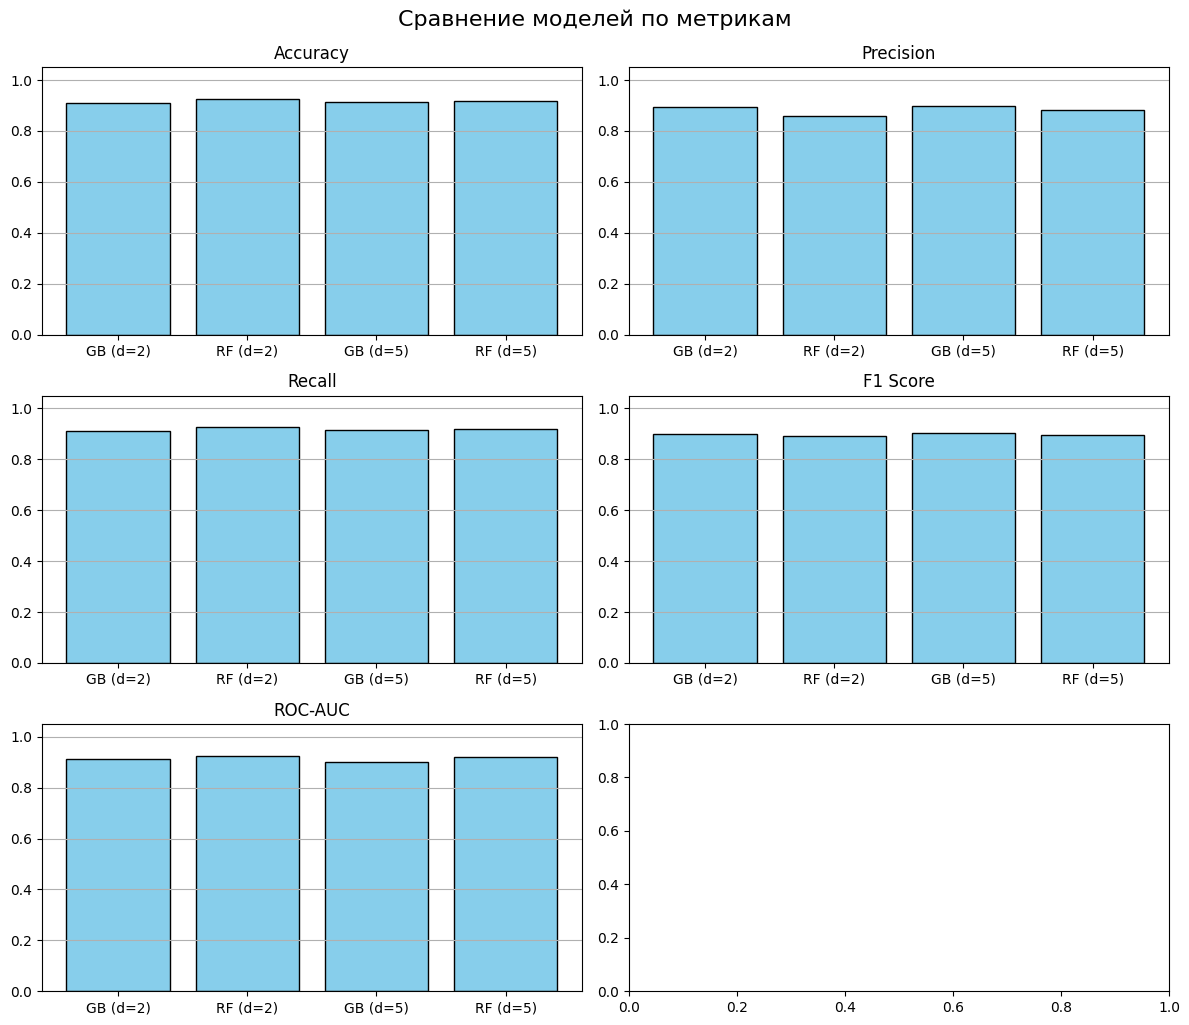

In [ ]:
# Данные метрик
models = [
    "GB (d=2)", "RF (d=2)",
    "GB (d=5)", "RF (d=5)"
]

metrics = {
    "Accuracy": [0.9106, 0.9259, 0.9132, 0.9195],
    "Precision": [0.8947, 0.8573, 0.8974, 0.8832],
    "Recall": [0.9106, 0.9259, 0.9132, 0.9195],
    "F1 Score": [0.9002, 0.8903, 0.9037, 0.8952],
    "ROC-AUC": [0.9140, 0.9229, 0.9008, 0.9198],
}

x = np.arange(len(models))  # X координаты групп

fig, axs = plt.subplots(3, 2, figsize=(12, 10))
axs = axs.flatten()

for i, (metric, values) in enumerate(metrics.items()):
    axs[i].bar(x, values, color='skyblue', edgecolor='black')
    axs[i].set_title(metric)
    axs[i].set_xticks(x)
    axs[i].set_xticklabels(models)
    axs[i].set_ylim(0, 1.05)
    axs[i].grid(axis='y')

plt.tight_layout()
plt.suptitle("Сравнение моделей по метрикам", fontsize=16, y=1.02)
plt.savefig("../img/classifier_comparison.png")
plt.show()
